In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate 

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.metrics import precision_score, recall_score

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

import mglearn
from sklearn.datasets import load_breast_cancer, load_boston, load_iris, make_moons
from sklearn.datasets import load_digits, load_diabetes, load_wine

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

# conda install -c anaconda py-xgboost
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance, plot_tree

# pip install lightgbm
from lightgbm import LGBMClassifier, LGBMRegressor
from lightgbm import plot_importance, plot_tree, plot_metric

from sklearn.svm import SVR, SVC

import statsmodels.api as sm

import os
os.environ["PATH"] += os.pathsep + "C:\\Program Files\\Graphviz\\bin"
from sklearn.tree import export_graphviz
import graphviz

# 1. SVM의 장점

+ a. 선형 분류 뿐 아니라 비선형 분류도 가능
+ b. 모델을 만들 때 고려해야 할 파라미터가 많지 않음
+ c. 적은 양의 데이터로도 모델을 만들 수 있음
+ d. 딥러닝이 이전에는 분류 모형 중에서 기술적으로 가장 진보된 모형으로 평가 되었음


# 2. 적용분야
+ a. 문서 분류
+ b. 이미지 인식, 안면 인식
+ c. 주가 예측
+ d. 부도 예측
+ e. 고객 구매 예측
+ f. 채권 등급 평가 예측
+ g. 필체 패턴 인식


+ 회귀, 분류 이상치 탐지 등에 사용되는 지도 학습 방법

+ 클래스 사이의 경계에 위치한 데이터 포인터를 서포트 벡터라고 한다.

+ 각 서포트 벡터가 클래스 사이의 결정 경계를 구분하는 데 어마나 중요한지를 학습 

+ 각 서포트 벡터의 거리와 마진이 가장 큰 방향으로 학습

+ 서포트 벡터까지의 서포트 벡터의 중요도를 기반으로 예측을 수행

    - 회귀, 분류 : SVR,SVC
    - 선형, 비선형 : LinearSVC, LinearSVR, KernelSVC, KermelSVR

(100, 2)

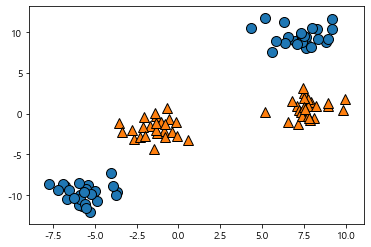

In [2]:
X, y = mglearn.datasets.make_blobs(centers=4,random_state=8)
y =y %2
mglearn.discrete_scatter(X[:,0],X[:,1],y)
X.shape

In [3]:
linear_svm = LinearSVC().fit(X,y)

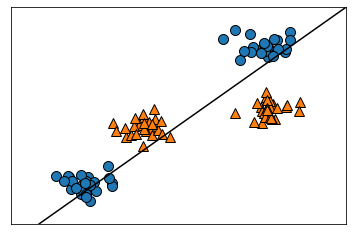

In [4]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
mglearn.plots.plot_2d_separator(linear_svm,X)

In [5]:
X_new = np.hstack([X,X[:,1:]**2]) # 제곱
X_new

array([[-1.72161036e+00, -1.48033142e+00,  2.19138111e+00],
       [-3.65733840e+00, -9.54823830e+00,  9.11688546e+01],
       [ 7.07781630e+00,  9.95087718e-01,  9.90199567e-01],
       [-1.36579859e+00, -3.14862498e-01,  9.91383928e-02],
       [-2.66521206e+00, -3.12591651e+00,  9.77135405e+00],
       [ 7.63027116e+00,  8.69797933e+00,  7.56548444e+01],
       [-5.27144331e+00, -1.21188070e+01,  1.46865483e+02],
       [ 7.91767139e+00,  1.41547387e+00,  2.00356628e+00],
       [-1.41284184e+00,  1.12963480e-01,  1.27607478e-02],
       [-1.01519039e+00, -1.03318203e+00,  1.06746511e+00],
       [ 8.26341570e+00,  1.03472344e+01,  1.07065259e+02],
       [ 6.96767867e+00,  8.96225230e+00,  8.03219662e+01],
       [-8.47792492e-01, -2.12185612e+00,  4.50227339e+00],
       [ 7.48006237e+00,  2.49392925e+00,  6.21968311e+00],
       [ 7.71454967e+00,  1.84207010e+00,  3.39322225e+00],
       [-7.74064658e+00, -8.61800744e+00,  7.42700522e+01],
       [-5.41087235e+00, -8.71941280e+00

Text(0.5, 0, '특성1**2')

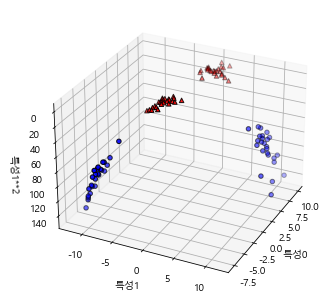

In [6]:
from mpl_toolkits.mplot3d import Axes3D,axes3d
figure = plt.figure()

ax = Axes3D(figure,elev=-152,azim=-26)

mask =y == 0
mask



ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c="b",cmap=mglearn.cm2,edgecolor="k")
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c="r",cmap=mglearn.cm2,edgecolor="k",marker="^")

ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1**2")

Text(0.5, 0, '특성1 ** 2')

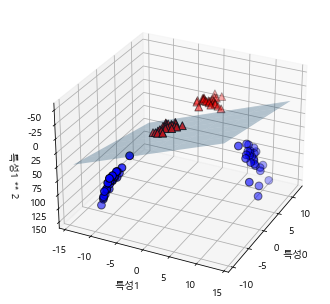

In [7]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# 선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60,  edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', 
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")


Text(0, 0.5, '특성 1')

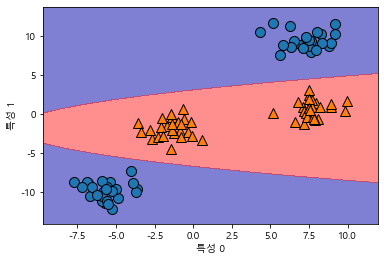

In [8]:
# 3차원을 옮겨놓음! 평면으로

ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], 
            cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")


## 2. 하이퍼 파라미터

+ cost
    - decision boundary와 마진의 간격을 어느 정도로 할지 결정
    - cost가 작으면 마진은 넓어진다.
    
+ gamma
    - 훈련 데이터 하나 당 영향을 끼치는 범위를 조절하는 변수
    - gamma가 작을수록 영향을 끼치는 범위가 넓어진다.

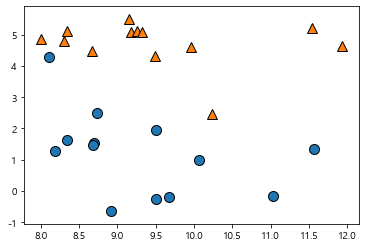

In [9]:
X,y = mglearn.tools.make_handcrafted_dataset()

mglearn.discrete_scatter(X[:,0],X[:,1],y)

In [10]:
svm = SVC(kernel="rbf", C=10, gamma=0.1).fit(X,y)

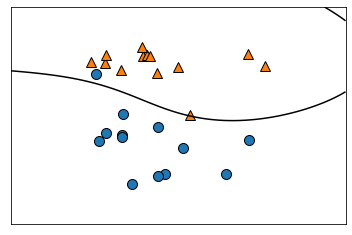

In [11]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
mglearn.plots.plot_2d_separator(svm,X)

In [12]:
sv = svm.support_vectors_

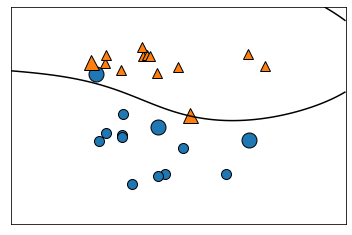

In [13]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
mglearn.plots.plot_2d_separator(svm,X)

sv_labels=svm.dual_coef_.ravel()>0
mglearn.discrete_scatter(sv[:,0],sv[:,1],sv_labels,s=15)

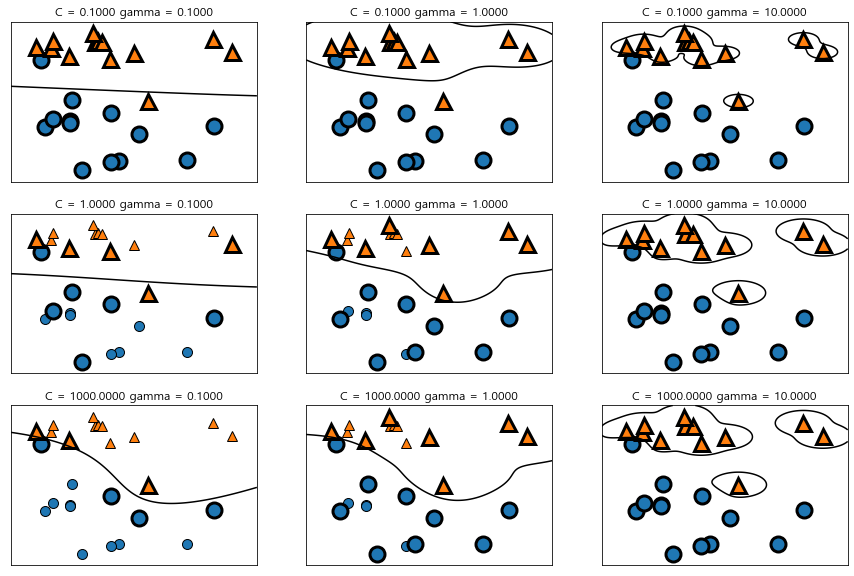

In [14]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C = C, log_gamma = gamma, ax=a)


## 3. SVM 클래스의 종류 

#### (1) 회귀 모델과 분류 모델

###### (1) 회귀 모델(SVR)

In [15]:
X,y = load_boston(return_X_y = True)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 123)

model =SVR()

model.fit(X_train,y_train)

print("학습 결과:",model.score(X_train,y_train))
print("테스트 결과:",model.score(X_test,y_test))




학습 결과: 0.21772837063748762
테스트 결과: 0.13544178468518187


###### 2)분류 모델

In [16]:
X,y = load_breast_cancer(return_X_y = True)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 123)

model =SVR()

model.fit(X_train,y_train)

print("학습 결과:",model.score(X_train,y_train))
print("테스트 결과:",model.score(X_test,y_test))

학습 결과: 0.7141833202421761
테스트 결과: 0.7625209396028008


### (2) 커널 기법

+ 입력 데이터를 고차원 공간에 사상해서 비선형 특징을 학습할 수 있도록 확장하는 방법
+ scikit-learn에서는 Linear, Polynomial, RBF(Radial Basis Function) 등 다양한 커널 기법을 지원

In [17]:
#### 회귀 모델에서 확인

X,y = load_boston(return_X_y = True)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 123)


linear_svr = SVR(kernel="linear")
linear_svr.fit(X_train,y_train)

print("학습 결과:",linear_svr.score(X_train,y_train))
print("테스트 결과:",linear_svr.score(X_test,y_test))

print("-------------------------------------------------")

polynomial_svr = SVR(kernel="poly")
polynomial_svr.fit(X_train,y_train)

print("학습 결과:",polynomial_svr.score(X_train,y_train))
print("테스트 결과:",polynomial_svr.score(X_test,y_test))

print("-------------------------------------------------")


rbf_svr = SVR(kernel="rbf")
rbf_svr.fit(X_train, y_train)

print("학습 결과:",rbf_svr.score(X_train,y_train))
print("테스트 결과:",rbf_svr.score(X_test,y_test))

학습 결과: 0.7155066205123104
테스트 결과: 0.6380398541381507
-------------------------------------------------
학습 결과: 0.2024454261446289
테스트 결과: 0.133668450367462
-------------------------------------------------
학습 결과: 0.21772837063748762
테스트 결과: 0.13544178468518187


In [18]:
##### 분류 모델에서 확인

X,y = load_breast_cancer(return_X_y = True)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 123)


linear_svc = SVC(kernel="linear")
linear_svc.fit(X_train,y_train)

print("학습 결과:",linear_svc.score(X_train,y_train))
print("테스트 결과:",linear_svc.score(X_test,y_test))

print("-------------------------------------------------")

polynomial_svc = SVC(kernel="poly")
polynomial_svc.fit(X_train,y_train)

print("학습 결과:",polynomial_svc.score(X_train,y_train))
print("테스트 결과:",polynomial_svc.score(X_test,y_test))

print("-------------------------------------------------")


rbf_svc = SVC(kernel="rbf")
rbf_svc.fit(X_train, y_train)

print("학습 결과:",rbf_svc.score(X_train,y_train))
print("테스트 결과:",rbf_svc.score(X_test,y_test))


학습 결과: 0.960093896713615
테스트 결과: 0.986013986013986
-------------------------------------------------
학습 결과: 0.9014084507042254
테스트 결과: 0.9230769230769231
-------------------------------------------------
학습 결과: 0.9014084507042254
테스트 결과: 0.9230769230769231


### (3) 매개변수 튜닝

+ SVM은 사용하는 커널에 따라 다양한 매개변수 설정가능
+ 매개변수를 변경하면서 성능 변화를 관찰

In [41]:
X,y = load_breast_cancer(return_X_y =True)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 123)


In [ ]:
##### polynoial 기법 사용

polynomial_svc = SVC(kernel="poly", C=0.1,gamma="auto")
polynomial_svc.fit(X_train,y_train)

print("kernel=poly,C={},gamma={}".format(0.1,"auto"))

print("polynimial 학습 결과:",polynomial_svc.score(X_train,y_train))
print("polynimial 테스트 결과:",polynomial_svc.score(X_test,y_test))

In [ ]:
##### rb 기법 사용

rbf_svc = SVC(kernel="rbf", C=10,gamma="scale")
rbf_svc.fit(X_train,y_train)

print("kernel=rbf,c={},gamma={}".format(10,"scale"))

print("rbf 학습 결과:",rbf_svc.score(X_train,y_train))
print("rbf 테스트 결과:",rbf_svc.score(X_test,y_test))

### (4) 데이터 전처리

+ SVM은 입력 데이터가 정규화되어야 좋은 성능을 보인다.
+ 주로 모든 특성값을 0, 1 범위로 맞추는 방법을 사용한다.
+ sklearn의 StandardScaler 또는 MinMaxScaler 사용

In [ ]:
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [ ]:
model = SVC()
model.fit(X_train, y_train)

print("학습 결과 : ", model.score(X_train, y_train))
print("테스트 결과 : ", model.score(X_test, y_test))

In [ ]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


In [ ]:
model = SVC()
model.fit(X_train_std, y_train)

print("학습 결과:" , model.score(X_train_std, y_train))
print("테스트 결과:" , model.score(X_test_std, y_test))

In [ ]:
scaler = MinMaxScaler()
X_train_mms = scaler.fit_transform(X_train)
X_test_mms = scaler.transform(X_test)


In [ ]:
model = SVC()
model.fit(X_train_mms, y_train)

print("학습 결과:" , model.score(X_train_mms, y_train))
print("테스트 결과:" , model.score(X_test_mms, y_test))

In [ ]:
min = X_train.min(axis=0)
range = (X_train - min).max(axis = 0)

X_train_cus = (X_train - min) / range
X_test_cus = (X_test - min) / range

In [36]:
model = SVC()
model.fit(X_train_cus, y_train)

print("학습 결과 : ", model.score(X_train_cus, y_train))
print("테스트 결과 : ", model.score(X_test_cus, y_test))


학습 결과 :  0.9812206572769953
테스트 결과 :  0.986013986013986


# (5) LinearSVR
### 1) Boston Housing Sample

In [20]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [21]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
model = SVR(kernel="linear")
model.fit(X_train, y_train)

SVR(kernel='linear')

In [23]:
print("학습 결과 : ", model.score(X_train, y_train))
print("테스트 결과 : ", model.score(X_test, y_test))


학습 결과 :  0.6907068954791997
테스트 결과 :  0.7824931802679187


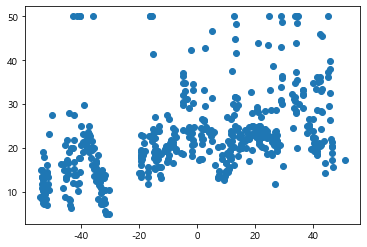

In [24]:
from sklearn.manifold import TSNE
##### 차원 축소

X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y)

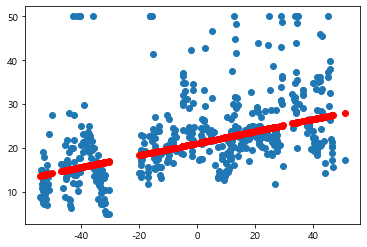

In [25]:
model.fit(X_comp, y)

predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color="r")

In [26]:
from sklearn.pipeline import make_pipeline
import multiprocessing

estimator = make_pipeline(StandardScaler(), SVR(kernel="linear"))
cross_validate(
    estimator=estimator,
    X = X,
    y = y,
    cv = 5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    8.5s finished


{'fit_time': array([0.02809215, 0.04787159, 0.04587507, 0.02792907, 0.04587603]),
 'score_time': array([0.00300097, 0.0069809 , 0.00498676, 0.00298738, 0.00498629]),
 'test_score': array([0.76908568, 0.72180141, 0.56428426, 0.14083339, 0.07810211])}

In [27]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([("scaler", StandardScaler()), ("model", SVR(kernel="linear"))])
params = [
    {
        "model__gamma":["scale", "auto"],
        "model__C":[1.0, 0.1, 0.01],
        "model__epsilon":[1.0, 0.1, 0.01]
    }
]

gs = GridSearchCV(
    estimator=pipe,
    param_grid=params,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=4,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [28]:
print(gs.best_params_)
print(gs.best_estimator_)
print(gs.best_score_)

{'model__C': 0.1, 'model__epsilon': 1.0, 'model__gamma': 'scale'}
Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(C=0.1, epsilon=1.0, kernel='linear'))])
0.49854468515516936


In [29]:
model = SVR(kernel="linear", C=0.1, gamma="scale", epsilon=1.0)
model.fit(X_train, y_train)

print("학습 결과 : ", model.score(X_train, y_train))
print("테스트 결과 : ", model.score(X_test, y_test))

학습 결과 :  0.6711129401939937
테스트 결과 :  0.7698251444546318


#### 2) Diabetes Sample

In [30]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=123)

In [31]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
model = SVR(kernel="linear")
model.fit(X_train, y_train)

print("학습 결과 : ", model.score(X_train, y_train))
print("테스트 결과 : ", model.score(X_test, y_test))


학습 결과 :  0.4924588716811171
테스트 결과 :  0.5570136940699909


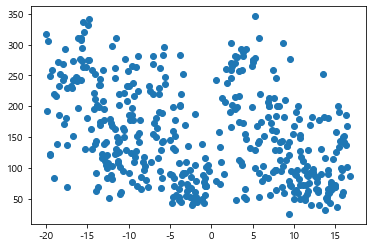

In [33]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y)

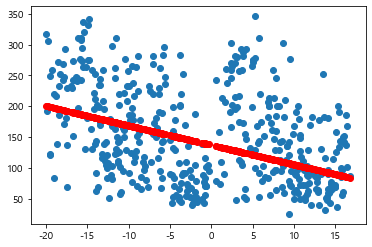

In [34]:

model.fit(X_comp, y)

predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color="r")

In [35]:
estimator = make_pipeline(StandardScaler(), SVR(kernel="linear"))
cross_validate(
    estimator=estimator,
    X = X,
    y = y,
    cv = 5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.02493215, 0.01894808, 0.02493525, 0.01895022, 0.02294207]),
 'score_time': array([0.00299144, 0.00399089, 0.00398993, 0.00398874, 0.00298953]),
 'test_score': array([0.43037242, 0.51653341, 0.48275332, 0.42247202, 0.53076481])}

In [36]:
pipe = Pipeline([("scaler", StandardScaler()), ("model", SVR(kernel="linear"))])
params = [
    {
        "model__gamma":["scale", "auto"],
        "model__C":[1.0, 0.1, 0.01],
        "model__epsilon":[1.0, 0.1, 0.01]
    }
]

gs = GridSearchCV(
    estimator=pipe,
    param_grid=params,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=4,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [37]:
print(gs.best_params_)
print(gs.best_score_)

model = SVR(kernel="linear", C=1.0, gamma="scale", epsilon=1.0)
model.fit(X_train, y_train)

print("학습 결과 : ", model.score(X_train, y_train))
print("테스트 결과 : ", model.score(X_test, y_test))

{'model__C': 1.0, 'model__epsilon': 1.0, 'model__gamma': 'scale'}
0.478076999215815
학습 결과 :  0.49306502223681103
테스트 결과 :  0.5563982990905709


# (6) KernelSVR


##### 1) BOSTON HOUSING Sample

In [38]:
X,y = load_boston(return_X_y = True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =.123)

scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

model = SVR(kernel="rbf")
model.fit(X_train,y_train)

print("학습 결과 : ", model.score(X_train, y_train))
print("테스트 결과 : ", model.score(X_test, y_test))





학습 결과 :  0.7095717031438109
테스트 결과 :  0.48920081019633366


In [40]:
from sklearn.manifold import TSNE
#### 차원축소

X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp,y)

model.fit(X_comp,y)
predict= model.predict(X_comp)
plt.scatter(X_comp,y)
plt.scatter(X_comp,predict,color="r")

from sklearn.pipeline import make_pipeline
import multiprocessing

estimator = make_pipeline(StandardScaler(),SVR(kernel="linear"))
cross_validate(
    estimator=estimator,
    X =X, 
    y =y,
    cv =5,
    n_jobs=multiprocessing.cpu_conut(),
    verbose=True)


from sklearn.pipeline import Pipeline

pipe = Pipeline([("scaler",(StandardScaler()),("model",SVR(kernel="linear"))])
                  
params = [
    {
        "model__gamma":["scale","auto"],
        "model__C":[1.0,0.1,0.01],
        "model__epsilon":[1.0,0.1,0.01]
    }
]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = params,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X,y)

print(gs.best_params_)
print(gs.bset_estimator_)
print(gs.best_score_)

model = SVR(kernel="linear",C=0.1,gamma="scale",epsilon=1.0)
model.fit(X_train,y_train)

print("학습 결과 : ", model.score(X_train, y_train))
print("테스트 결과 : ", model.score(X_test, y_test))

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (<ipython-input-40-e7e1209ab0a9>, line 27)

# (7) LinearSVC

### 1) breast cancer sample

#### 2) 붓꽃 데이터

#### 3) Wine Sample

# (8) KernelSVC

#### 1) breast cancer sample

#### 2) iris sample

#### 3) wine sample

## (8)예제

#### (1) 농구선수의 포지션 예측

In [4]:
df = pd.read_csv("data1/basketball_stat.csv")
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [12]:
df.Pos.value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  100 non-null    object 
 1   Pos     100 non-null    object 
 2   3P      100 non-null    float64
 3   2P      100 non-null    float64
 4   TRB     100 non-null    float64
 5   AST     100 non-null    float64
 6   STL     100 non-null    float64
 7   BLK     100 non-null    float64
dtypes: float64(6), object(2)
memory usage: 6.4+ KB


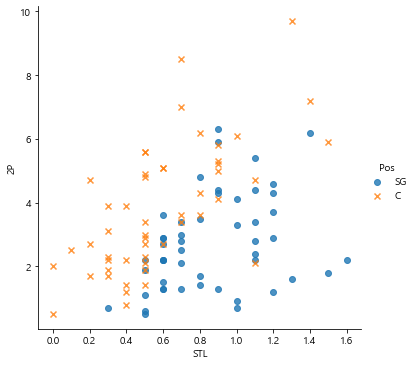

In [11]:
sns.lmplot("STL","2P",data=df, fit_reg=False,hue="Pos",markers=["o","x"])

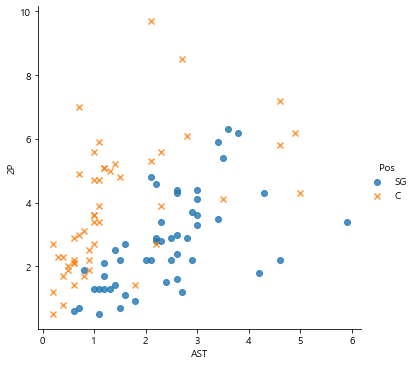

In [13]:
sns.lmplot("AST","2P",data=df, fit_reg=False,hue="Pos",markers=["o","x"])

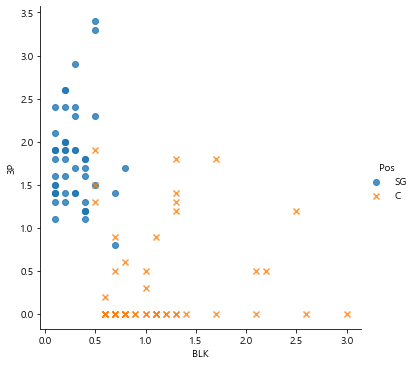

In [14]:
sns.lmplot("BLK","3P",data=df, fit_reg=False,hue="Pos",markers=["o","x"])

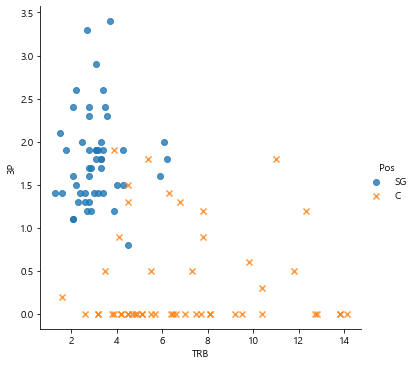

In [15]:
sns.lmplot("TRB","3P",data=df, fit_reg=False,hue="Pos",markers=["o","x"])

In [16]:
# 2점 어시 스틸
df.drop(["2P","AST","STL"],axis=1,inplace=True) # axis= 1 열
# 관련없는 변수삭제

In [32]:
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [33]:
train,test =train_test_split(df,test_size=.2)
print(train.shape,test.shape)

(80, 5) (20, 5)


In [38]:
X_train = train[["3P","TRB","BLK"]]
y_train = train["Pos"]

In [42]:
params =[{
          "kernel":["rbf","poly","sigmoid"],
          "gamma":["scale","auto"],
          "C":[0.01,0.1,1,10,100,1000]
}]

svm = GridSearchCV(SVC(),params).fit(X_train,y_train)

In [44]:
X_test = test[["3P","TRB","BLK"]]
y_test = test["Pos"]

In [47]:
preds =svm.predict(X_test)

In [48]:
print("정확도:",accuracy_score(y_test,preds))

정확도: 0.85


# 2) 손글씨 이미지

In [5]:
import struct
def to_csv(name, maxdata):
    # 레이블 파일과 이미지 파일 열기
    lbl_f = open("./mnist/"+name+"-labels-idx1-ubyte", "rb")
    img_f = open("./mnist/"+name+"-images-idx3-ubyte", "rb")
    csv_f = open("./mnist/"+name+".csv", "w", encoding="utf-8")
    # 헤더 정보 읽기 --- (※1)
    mag, lbl_count = struct.unpack(">II", lbl_f.read(8))
    mag, img_count = struct.unpack(">II", img_f.read(8))
    rows, cols = struct.unpack(">II", img_f.read(8))
    pixels = rows * cols
    # 이미지 데이터를 읽고 CSV로 저장하기 --- (※2)
    res = []
    for idx in range(lbl_count):
        if idx > maxdata: break
        label = struct.unpack("B", lbl_f.read(1))[0]
        bdata = img_f.read(pixels)
        sdata = list(map(lambda n: str(n), bdata))
        csv_f.write(str(label)+",")
        csv_f.write(",".join(sdata)+"\r\n")
        # 잘 저장됐는지 이미지 파일로 저장해서 테스트하기 -- (※3)
        if idx < 10:
            s = "P2 28 28 255\n"
            s += " ".join(sdata)
            iname = "./mnist/{0}-{1}-{2}.pgm".format(name,idx,label)
            with open(iname, "w", encoding="utf-8") as f:
                f.write(s)
    csv_f.close()
    lbl_f.close()
    img_f.close()
# 결과를 파일로 출력하기 --- (※4)
to_csv("train", 60000)
to_csv("t10k", 10000)

FileNotFoundError: [Errno 2] No such file or directory: './mnist/train-labels-idx1-ubyte'

In [3]:
def load_csv(fname):
    labels = []
    images = []
    
    f = open(fname, "r")
    for line in f:
        cols = line.split(",")
        
        if len(cols) < 2:
            continue
            
        labels.append(int(cols.pop(0)))
    
        vals = list(map(lambda n : round(int(n)/256), cols))
        images.append(vals)
        
    f.close()
    
    return {"y":labels, "X":images}

In [4]:
train =load_csv("data1/MNIST_data/train.csv")

test =load_csv("data1/MNIST_data/t10k.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'data1/MNIST_data/train.csv'

In [77]:
print(train["X"][3])
print(train["y"][3])

KeyError: 'X'

In [78]:
model = SVC().fit(train["X"],train["y"])

KeyError: 'X'

In [79]:
preds = model.predict(test["X"])

NameError: name 'model' is not defined

In [80]:
acc = accuracy_score(test["y"],preds)
print("정확도",acc)

KeyError: 'y'

In [81]:
print(classification_report(test["y"],preds))

KeyError: 'y'

In [82]:
pred1 = model.predict([test["X"][220]])
pred1

NameError: name 'model' is not defined

In [83]:
test["y"][220]

KeyError: 'y'

In [84]:
plt.imshow(np.array["X"][220].reshape(28,28))

TypeError: 'builtin_function_or_method' object is not subscriptable

In [85]:
from IPython.display import HTML

HTML(input form + javascript)

SyntaxError: invalid syntax (<ipython-input-85-25b4bdc1577e>, line 3)

In [86]:
print(image)

NameError: name 'image' is not defined

In [87]:
preds = model.predict([image])
preds

NameError: name 'model' is not defined

## 4. 학습 모델 저장

+ serializable

    + pickle
    + joblib


In [106]:
import pickle

phone = {"tom":"111-111","길동":"222-2222"}
product = ["마우스","키보드"]

obj = (phone,product)
obj

obj[1]
obj[1][0]
obj[0]["길동"]

#저장

f = open("data1/obj1.pickle","wb")
pickle.dump(obj,f)

f.close()

In [108]:
# 불러오기
f = open("data1/obj1.pickle","rb")

obj2 = pickle.load(f)
obj2

({'tom': '111-111', '길동': '222-2222'}, ['마우스', '키보드'])

In [109]:
#### 학습된 데이터 모델 저장

iris = load_iris()
X,y = iris.data,iris.target

clf = LogisticRegression(random_state=0,max_iter=10000)
clf.fit(X,y)

LogisticRegression(max_iter=10000, random_state=0)

In [111]:
f = open("data1/iris_logistic.pickle","wb")
pickle.dump(clf,f)
f.close()

In [112]:
f = open("data1/iris_logistic.pickle","wb")
clf2 = pickle.load(f)

print(clf2.predict(X))
f.close

UnsupportedOperation: read

In [113]:
import joblib

In [116]:
joblib.dump(clf,"data1/iris_logistic.pkl")

['data1/iris_logistic.pkl']

In [117]:
clf3 = joblib.load("data1/iris_logistic.pkl")

In [118]:
print(clf3.predict(X))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
